# 1. Introduction
In baseball, "switch hitters" switch their bat stance with the opposite hand from the pitcher. For example, When the Brave's second baseman Ozzie Albies faces a lefty pitcher, he bats righty. Switch hitters are deemed valuable for their ability to face any pitcher. Nevertheless, is there a significant advantage for the batters when the pitcher and the batter are opposite-handed? Could it be another "old-school tradition" that baseball players follow? This research will help deep dive into the batters' performance based on the pitcher's handedness. This research will benefit casual baseball fans and sports analysts alike. Because we are using actual data from the 2021 season, and both audiences will find the data relevant and useful.

# 2. Hypothesis
$H_0$: There is no significant difference between batters who bat against the pitchers with the same hand versus batters who bat against the pitchers with the opposite hand.

$ H_a$: There is a significant difference between batters who bat against the pitchers with the same hand versus batters who bat against the pitchers with the opposite hand.

# 3. Data
The data we will be using is from [FanGraphs.com](https://www.fangraphs.com). FanGraphs has a great filter system for end-users to download quickly, including Splits Leaderboard. There are four .csv files: 
* [left-handed pitcher vs. left-handed hitter](https://www.fangraphs.com/leaders/splits-leaderboards?splitArr=1,3&splitArrPitch=&position=B&autoPt=true&splitTeams=false&statType=player&statgroup=2&startDate=2021-03-01&endDate=2021-11-01&players=&filter=&groupBy=season&sort=-1,1) 
* [left-handed pitcher vs. right-handed hitter](https://www.fangraphs.com/leaders/splits-leaderboards?splitArr=1,4&splitArrPitch=&position=B&autoPt=true&splitTeams=false&statType=player&statgroup=2&startDate=2021-03-01&endDate=2021-11-01&players=&filter=&groupBy=season&sort=-1,1)
* [right-handed pitcher vs. left-handed hitter](https://www.fangraphs.com/leaders/splits-leaderboards?splitArr=2,3&splitArrPitch=&position=B&autoPt=true&splitTeams=false&statType=player&statgroup=2&startDate=2021-03-01&endDate=2021-11-01&players=&filter=&groupBy=season&sort=-1,1)
* [right-handed pitcher vs. right-handed hitter](https://www.fangraphs.com/leaders/splits-leaderboards?splitArr=2,4&splitArrPitch=&position=B&autoPt=true&splitTeams=false&statType=player&statgroup=2&startDate=2021-03-01&endDate=2021-11-01&players=&filter=&groupBy=season&sort=-1,1)

There are a few facts and assumptions that we will be making while utilizing the dataset.
1. We will only look at players who are in the Major League Baseball (MLB) system.
1. We will only look at players who played during the 2021 season.
1. To ensure all on-base plus slugging (OPS) is fair and statistically accurate, we will only look at players with a plate appearance of a minimum of 60. 
1. For the simplicity of the research, we will sort the data into two groups, same handedness between pitcher and batter and opposite handedness between pitcher and batter. For instance, the first group will be both a lefty pitcher and a lefty batter combination and a righty pitcher and a righty batter combination. The second group will be a lefty pitcher and a righty batter combination and a righty pitcher and a lefty batter combination.
1. We will only look at OPS as the batter's performance measure.

The data contains 810 non-null observations and 20 variables. There are no missing values. 

In [1]:
# set up environment.
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Import the dataset.
mlb_batters = pd.read_csv("Splits Leaderboard Data .csv")

mlb_batters.info()
pd.crosstab(mlb_batters['pitch handedness'], mlb_batters['handedness'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            810 non-null    int64  
 1   Name              810 non-null    object 
 2   Tm                810 non-null    object 
 3   PA                810 non-null    int64  
 4   BB%               810 non-null    float64
 5   K%                810 non-null    float64
 6   BB/K              810 non-null    float64
 7   AVG               810 non-null    float64
 8   OBP               810 non-null    float64
 9   SLG               810 non-null    float64
 10  OPS               810 non-null    float64
 11  ISO               810 non-null    float64
 12  BABIP             810 non-null    float64
 13  wRC               810 non-null    float64
 14  wRAA              810 non-null    float64
 15  wOBA              810 non-null    float64
 16  wRC+              810 non-null    float64
 1

handedness,left,right
pitch handedness,,
left,92,253
right,253,212


In [3]:
mlb_batters.head()

,Season,Name,Tm,PA,BB%,K%,BB/K,AVG,OBP,SLG,OPS,ISO,BABIP,wRC,wRAA,wOBA,wRC+,playerId,pitch handedness,handedness
0,2021,David Peralta,ARI,92,0.054348,0.173913,0.312500,0.267442,0.315217,0.418605,0.733822,0.151163,0.318841,11.298388,0.157518,0.316479,94.801644,2136,left,left
1,2021,Anthony Rizzo,2 Tms,171,0.064327,0.099415,0.647059,0.324503,0.397661,0.503311,0.900972,0.178808,0.328125,31.266254,10.558768,0.389042,145.281171,3473,left,left
2,2021,Eric Hosmer,SDP,158,0.031646,0.170886,0.185185,0.261745,0.292994,0.382550,0.675544,0.120805,0.300000,16.193469,-2.939764,0.291921,84.425314,3516,left,left
3,2021,Michael Brantley,HOU,180,0.044444,0.133333,0.333333,0.218935,0.261111,0.313609,0.574721,0.094675,0.243056,12.492723,-9.304630,0.251930,58.920960,4106,left,left
4,2021,Joey Votto,CIN,166,0.114458,0.283133,0.404255,0.215278,0.313253,0.388889,0.702142,0.173611,0.279570,19.169111,-0.932893,0.307617,85.996266,4314,left,left


# 4. Methods
First, I will split the dataset into two DataFrames. The first group will be both a lefty pitcher and a lefty batter combination and a righty pitcher and a righty batter combination. The second group will be a lefty pitcher and a righty batter combination and a righty pitcher and a lefty batter combination. I feel that the best approach is to combine the same handedness into one DataFrame and vice versa into another DataFrame. Two DataFrames will allow for a more interpretable and more stable result with larger sample size and only two groups. 

Then I will check for the normality using histogram, skewness, and kurtosis. Once I analyze the normality of the data, I will use an appropriate statistical test to derive the result. 

In [4]:
# Split up dataset.
PLBL = (mlb_batters['pitch handedness'] == 'left') & (mlb_batters['handedness'] == 'left')
PRBR = (mlb_batters['pitch handedness'] == 'right') & (mlb_batters['handedness'] == 'right')
same_hand = pd.concat([mlb_batters.iloc[PLBL.values], mlb_batters.iloc[PRBR.values]], axis = 0)
same_hand.info()

PLBR = (mlb_batters['pitch handedness'] == 'left') & (mlb_batters['handedness'] == 'right')
PRBL = (mlb_batters['pitch handedness'] == 'right') & (mlb_batters['handedness'] == 'left')
diff_hand = pd.concat([mlb_batters.iloc[PLBR.values], mlb_batters.iloc[PRBL.values]], axis = 0)
diff_hand.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 809
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            304 non-null    int64  
 1   Name              304 non-null    object 
 2   Tm                304 non-null    object 
 3   PA                304 non-null    int64  
 4   BB%               304 non-null    float64
 5   K%                304 non-null    float64
 6   BB/K              304 non-null    float64
 7   AVG               304 non-null    float64
 8   OBP               304 non-null    float64
 9   SLG               304 non-null    float64
 10  OPS               304 non-null    float64
 11  ISO               304 non-null    float64
 12  BABIP             304 non-null    float64
 13  wRC               304 non-null    float64
 14  wRAA              304 non-null    float64
 15  wOBA              304 non-null    float64
 16  wRC+              304 non-null    float64
 1

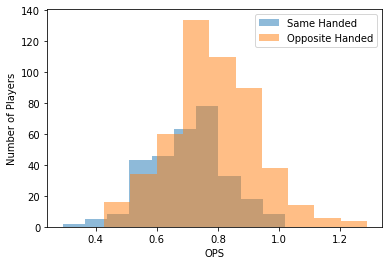

DescribeResult(nobs=304, minmax=(0.29184322, 1.02008734), mean=0.7018878792763158, variance=0.01574400627141334, skewness=-0.18684327048879765, kurtosis=0.12768485983023625)
DescribeResult(nobs=506, minmax=(0.42807018, 1.2870257), mean=0.7877119823715414, variance=0.02148568313741233, skewness=0.23403373792352197, kurtosis=0.39060507722770055)


In [5]:
# plot histograms and calculate skewness and kurtosis.
plt.hist(same_hand['OPS'], alpha = 0.5, label = "Same Handed")
plt.hist(diff_hand['OPS'], alpha = 0.5, label = "Opposite Handed")
plt.legend(loc = "upper right")
plt.ylabel("Number of Players")
plt.xlabel("OPS")
plt.show()

print(stats.describe(same_hand['OPS']))
print(stats.describe(diff_hand['OPS']))

In [6]:
# Conduct t-test and get 95% confidence interval.
print(stats.ttest_ind(same_hand['OPS'], diff_hand['OPS']))

def get_95_ci(array_1, array_2):
  sample_1_n = array_1.shape[0]
  sample_2_n = array_2.shape[0]
  sample_1_mean = array_1.mean()
  sample_2_mean = array_2.mean()
  sample_1_var = array_1.var()
  sample_2_var = array_2.var()
  mean_difference = sample_2_mean - sample_1_mean
  std_err_difference = math.sqrt((sample_1_var/sample_1_n) + (sample_2_var/sample_2_n))
  margin_of_error = 1.96 * std_err_difference
  ci_lower = mean_difference - margin_of_error
  ci_upper = mean_difference + margin_of_error
  return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(same_hand['OPS'], diff_hand['OPS']))

# What is the current mean for same handed batting and opposite handed batting?
print(same_hand['OPS'].mean())
print(diff_hand['OPS'].mean())

Ttest_indResult(statistic=-8.50617267901953, pvalue=8.656252573123656e-17)
The difference in means at the 95% confidence interval (two-tail) is between 0.06679581189756603 and 0.10485239429288515.
0.7018878792763154
0.7877119823715409


# 5. Results
Both groups' OPS are normally distributed based on a visual inspection, so I proceeded with the t-test. Skewness and kurtosis are also within -3 and 3, which further validates my decision. 

Based on a p-value < 0.05, I reject the null hypothesis. There is a significant difference between the two groups' performance. 

The 95% confidence interval suggests that the difference between the same-handed and opposite-handed groups is between 0.067 and 0.105, which can be interpreted as a significant difference in OPS. For instance, the average OPS for opposite-handed batters is 0.788, and the average OPS for same-handed batters is 0.702. The difference in these two numbers is significant enough for general managers to decide between two batters.

# 6. Discussion and recommendation

Now that we know the handedness matters for a batter, our subsequent research can be about a team's lineup. Because a pitcher must face at least two batters when he comes on the mound, a team can get a great result alternating lefty batters and righty batters. This makes for informative and inexpensive research that MLB can adopt.